todo: when building validation dataset, research the yrSold and MonthSold of the test dataset.

# Data Loading

In [3]:
from utils import load_house_prices_data
import matplotlib.pyplot as plt

housing_train = load_house_prices_data(source='train')
housing_test = load_house_prices_data(source='test')

# ydata-profiling (not Working)

In [4]:
from ydata_profiling import ProfileReport

# profile = ProfileReport(housing_train, title = 'Housing report')
# 
# profile.to_file('housing_profile_report.html')

# OverallQual vs Sale Price
we saw that 'OverallQual' had the greatest correlation to sale price. How do they look like together?

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

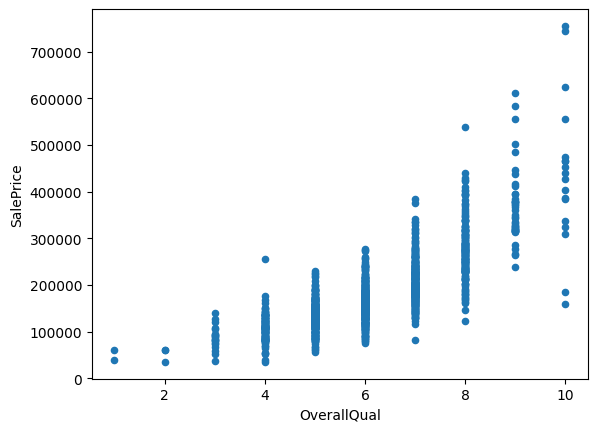

In [14]:
# housing_train.sort_values(by='SalePrice').plot(kind='scatter', x='Neighborhood', y='SalePrice')
housing_train.plot(kind='scatter', x='OverallQual', y='SalePrice')

<Axes: xlabel='YearBuilt', ylabel='GarageYrBlt'>

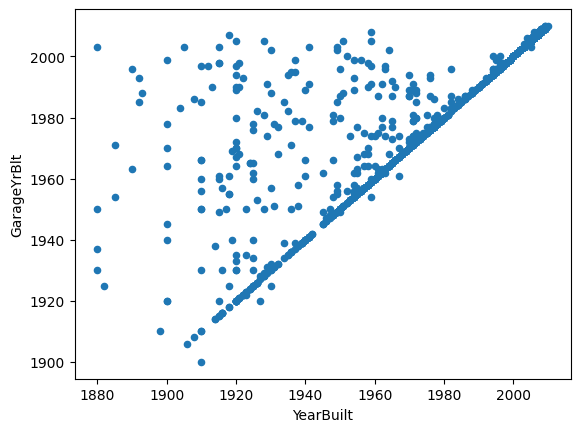

In [15]:
housing_train.plot(kind='scatter', x='YearBuilt', y='GarageYrBlt')

# Exploring Test Data

In [5]:
housing_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
